In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import tree, svm, linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
from sklearn.svm import SVC
from sklearn.metrics import plot_roc_curve
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from imblearn.metrics import sensitivity_specificity_support
df=pd.read_csv('CHI.csv')

In [2]:
X= df[[
'S4HIMATH_I',
'S4UNEMPCOMP_I',
'X2WHITE',
'X3HSCOMPSTAT',
'X4EVRTRANSHS',
'X4HSCOMPSTAT',
'X2RACE',
'X2SEX',
'X4EVERDROP',
'X3TGPAWGT',
'X3TGPATOT',
'X3TCREDTOT',
'X3TCREDACAD',
'X3TCREDMTSC',
'X3TGPAACAD',
'X3TGPASTEM',
'X3TGPASOCST',
'X3DROPOUTTIME',
'X3CONTROL',
'A2SUMRSCH',
'S4EVERWRYMNY',
    'X1FAMINCOME',
    'X2PAREDU',
    'X3TGPAMAT',
    'X3T1CREDPREC',
    'X3TCREDREM',
    'X2REQLEVEL'
]] 

y=df[['X4EVRAPPCLG']]

In [4]:
df = df.rename({"X4EVRAPPCLG":"AppliedToCollege"}, axis='columns')
df['AppliedToCollege'] = df['AppliedToCollege'].replace({1: 'Yes', 0: 'No'})

In [5]:
#standard scaler
stdscl=StandardScaler()
stdscl.fit(X)
X_std=stdscl.transform(X)

In [6]:
from sklearn.decomposition import PCA

pca_data = PCA(n_components=2)
pca_data.fit(X_std)


principalCA = pca_data.transform(X_std)

pca = pd.DataFrame(data = principalCA
             , columns = ['PCA1', 'PCA2'])


pca['AppliedToCollege']= y

pca.head()

,PCA1,PCA2,AppliedToCollege
0,5.947650,2.588419,0
1,-0.013907,-0.738607,0
2,1.806459,-1.378928,0
3,-0.599558,-0.575533,0
4,-2.676541,0.267777,0


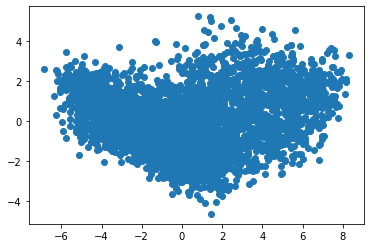

In [7]:
# Plot PCA

plt.scatter(pca['PCA1'], pca['PCA2'])

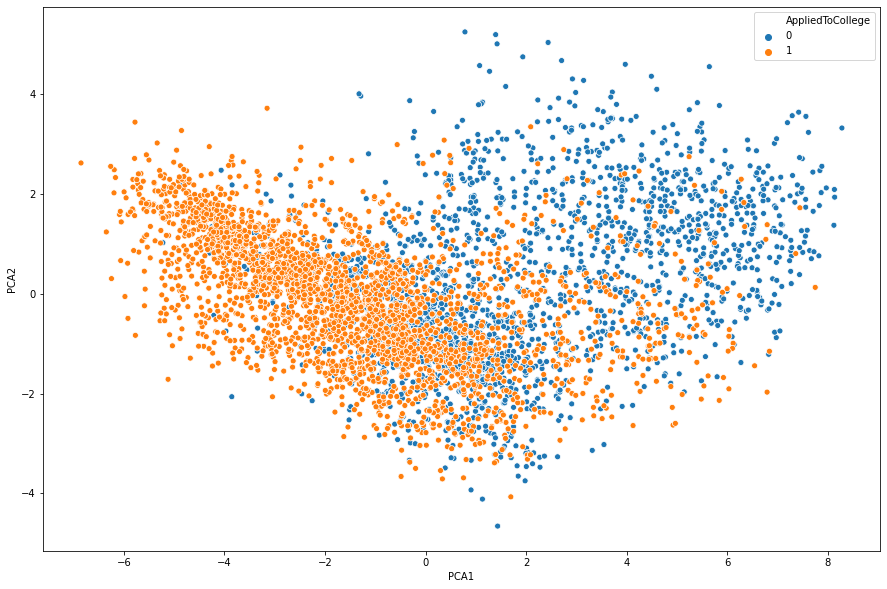

In [8]:
plt.subplots(figsize=(15,10))
ax = sns.scatterplot(x="PCA1", y="PCA2", hue="AppliedToCollege", data=pca)